In [ ]:
!cp /content/drive/MyDrive/c3i/MachineLearningCSV.zip .

In [ ]:
!unzip MachineLearningCSV.zip

Archive:  MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [ ]:
import pandas as pd
pd.options.display.max_columns = 5000
pd.options.display.max_rows = 5000

import numpy as np
import os

l = list(os.listdir("/content/MachineLearningCVE"))
for i in range(0, len(l)):
    l[i] = "/content/MachineLearningCVE/" + l[i]

df_full = pd.concat(
    map(pd.read_csv, l), ignore_index=True)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df_full.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df_full.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

## Check for destination Port

In the outliers

### a

In [ ]:
dp = df_full[" Destination Port"]

In [ ]:
import matplotlib.pyplot as plt
df_full[" Destination Port"].isna().sum()

0

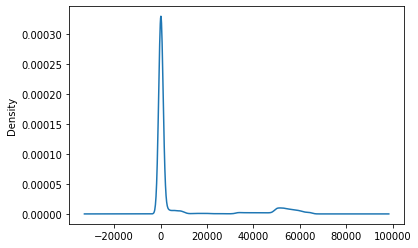

In [ ]:
df_full[" Destination Port"].plot.kde()

In [ ]:
2.3/100

0.023

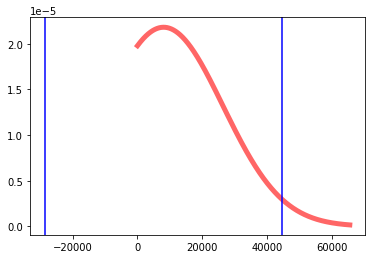

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import numpy as np


dat = df_full[" Destination Port"]
fig, ax = plt.subplots(1, 1)
x = list(range(0, max(dat), 1))
end = norm.ppf(1.00 - 0.023, loc=np.mean(dat), scale=np.std(dat))
begin = norm.ppf(0.023, loc=np.mean(dat), scale=np.std(dat))
ax.plot(x, norm.pdf(x,loc=np.mean(dat), scale=np.std(dat)),'r-', lw=5, alpha=0.6, label='norm pdf')
plt.axvline(end, color='blue')
plt.axvline(begin, color='blue')
del dat


In [ ]:
end

44554.51337960182

In [ ]:
begin

-28411.548376977003

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
y_true = enc.fit_transform(df_full[df_full[" Destination Port"] > end][" Label"])

In [ ]:
np.unique(y_true, return_counts=True)

(array([0, 1, 2, 3]), array([324831,    456,      2,   9059]))

In [ ]:
df_full[df_full[" Destination Port"] > end][" Label"].value_counts()

BENIGN      324831
PortScan      9059
Bot            456
DDoS             2
Name:  Label, dtype: int64

In [ ]:
any(df_full[" Destination Port"] < 0)

False

In [ ]:
min(df_full[" Destination Port"])

0

In [ ]:
df_full[" Destination Port"].describe()

count    2.830743e+06
mean     8.071483e+03
std      1.828363e+04
min      0.000000e+00
25%      5.300000e+01
50%      8.000000e+01
75%      4.430000e+02
max      6.553500e+04
Name:  Destination Port, dtype: float64

In [ ]:
df_full[" Destination Port"].value_counts()[0]

1696

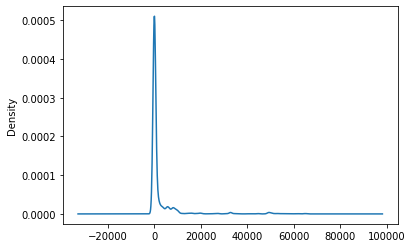

In [ ]:
df_full[df_full[" Label"] != 'BENIGN'][" Destination Port"].plot.kde()

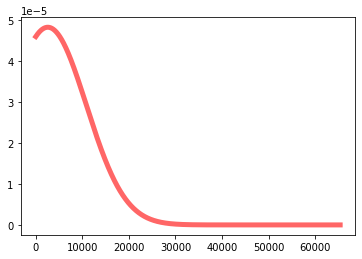

In [ ]:
dat = df_full[df_full[" Label"] != 'BENIGN'][" Destination Port"]
x = list(range(0, max(dat), 1))

plt.plot(x, norm.pdf(x,loc=np.mean(dat), scale=np.std(dat)),'r-', lw=5, alpha=0.6, label='norm pdf')

### b

In [ ]:
df_full[" Destination Port"].value_counts()

53       957971
80       618934
443      505710
123       23880
22        16941
          ...  
24026         1
24023         1
24080         1
18216         1
8915          1
Name:  Destination Port, Length: 53805, dtype: int64

### destination port not good for this as most overlap

## Flow duration

In [ ]:
df_full[" Flow Duration"].isna().sum()

0

In [ ]:
sum(df_full[" Flow Duration"] < 0 )

115

In [ ]:
df_full[" Flow Duration"][df_full[" Flow Duration"]<0].value_counts()

-1     109
-2       2
-12      2
-13      1
-4       1
Name:  Flow Duration, dtype: int64

In [ ]:
df_full[" Label"][df_full[" Flow Duration"]<0].value_counts()

BENIGN    115
Name:  Label, dtype: int64

In [ ]:
# dfl = df_full.drop([df_full[" Flow Duration"]<0])[" Flow Duration"]

In [ ]:
dfl = df_full.drop(df_full[df_full[" Flow Duration"]<0 ].index, axis=0)

In [ ]:
dfl[" Flow Duration"].value_counts()

In [ ]:
dfl[" Flow Duration"].isna().sum()

0

In [ ]:
dfl[" Flow Duration"].describe()

count    2.830628e+06
mean     1.478626e+07
std      3.365430e+07
min      0.000000e+00
25%      1.550000e+02
50%      3.131700e+04
75%      3.206060e+06
max      1.200000e+08
Name:  Flow Duration, dtype: float64

33654295.744652286

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import numpy as np


# dat = dfl[" Flow Duration"]
# fig, ax = plt.subplots(1, 1)
# x = 
mean = dfl[" Flow Duration"].mean()
loc = dfl[" Flow Duration"].std()

end = norm.ppf(1.00 - 0.023, loc=mean, scale=loc)
begin = norm.ppf(0.023, loc=mean, scale=loc)



In [ ]:
dfl[dfl[" Flow Duration"] > end][" Label"].value_counts()

BENIGN              153157
DoS Hulk            136851
DDoS                 11187
DoS slowloris         2935
DoS Slowhttptest      1216
DoS GoldenEye          852
PortScan                41
Infiltration            19
Heartbleed              10
SSH-Patator              2
Name:  Label, dtype: int64

In [ ]:
df_full[" Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [ ]:
df_full.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

# Distribution

## without preprocessing

In [ ]:
df_full = df_full.dropna()

In [ ]:
len(df_full)

2829385

In [ ]:
df_full.columns[:-1]

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
for i in df_full.columns[:-1]:
    dfx = df_full[i]
    mean = dfx.mean()
    loc = dfx.std()
    end = norm.ppf(1.00 - 0.023, loc=mean, scale=loc)
    begin = norm.ppf(0.023, loc=mean, scale=loc)

    # inds = dfx[(dfx < begin) | (dfx > end)]
    
    print(i)
    print("-------------")
    print(df_full.loc[dfx[(dfx < begin) | (dfx > end)].index][" Label"].value_counts())

    print("-------------")



 Destination Port
-------------
BENIGN      324665
PortScan      9059
Bot            456
DDoS             2
Name:  Label, dtype: int64
-------------
 Flow Duration
-------------
BENIGN              153136
DoS Hulk            136830
DDoS                 11152
DoS slowloris         2935
DoS Slowhttptest      1216
DoS GoldenEye          852
PortScan                41
Infiltration            19
Heartbleed              10
SSH-Patator              2
Name:  Label, dtype: int64
-------------
 Total Fwd Packets
-------------
BENIGN          335
Heartbleed       10
Infiltration      8
Name:  Label, dtype: int64
-------------
 Total Backward Packets
-------------
BENIGN          386
Heartbleed        9
Infiltration      6
Name:  Label, dtype: int64
-------------
Total Length of Fwd Packets
-------------
BENIGN                      5571
Web Attack � Brute Force      71
Bot                           44
Web Attack � XSS              16
Infiltration                  11
Heartbleed                     

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


BENIGN              108604
DoS Hulk             31309
FTP-Patator            822
PortScan               465
DoS Slowhttptest        11
Bot                      5
SSH-Patator              3
DDoS                     2
Name:  Label, dtype: int64
-------------
 Bwd Packets/s
-------------
BENIGN              16376
PortScan             6767
DoS Hulk              309
DoS Slowhttptest      182
Bot                   103
DDoS                   16
DoS slowloris          11
FTP-Patator             7
SSH-Patator             1
Name:  Label, dtype: int64
-------------
 Min Packet Length
-------------
BENIGN              38037
DoS Slowhttptest      347
Name:  Label, dtype: int64
-------------
 Max Packet Length
-------------
DoS Hulk                    105349
DDoS                         64556
BENIGN                       17804
DoS GoldenEye                 4302
PortScan                        49
Bot                             44
Heartbleed                      11
Web Attack � Brute Force         4


## remove inf and neg

In [ ]:
df_full.replace([np.inf, -np.inf], np.NaN, inplace=True)

In [ ]:
df_full["Flow Bytes/s"].describe()

count    2.827876e+06
mean     1.491719e+06
std      2.594016e+07
min     -2.610000e+08
25%      1.192924e+02
50%      4.586601e+03
75%      1.666667e+05
max      2.071000e+09
Name: Flow Bytes/s, dtype: float64

In [ ]:
any(df_full[' Destination Port'].describe() < 0)

False

In [ ]:
for i in df_full.columns[:-1]:
    if (any(df_full[i].describe() < 0)):
        print(i)

 Flow Duration
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Max
 Flow IAT Min
 Fwd IAT Min
 Fwd Header Length
 Bwd Header Length
 Fwd Header Length.1
Init_Win_bytes_forward
 Init_Win_bytes_backward
 min_seg_size_forward


In [ ]:
for i in df_full.columns[:-1]:
    if (any(df_full[i].describe() < 0)):
        print("-------------")
        print(i)
        print(df_full[i].describe())
        print("-------------")

-------------
 Flow Duration
count    2.829385e+06
mean     1.479276e+07
std      3.366026e+07
min     -1.300000e+01
25%      1.550000e+02
50%      3.132700e+04
75%      3.221416e+06
max      1.200000e+08
Name:  Flow Duration, dtype: float64
-------------
-------------
Flow Bytes/s
count    2.827876e+06
mean     1.491719e+06
std      2.594016e+07
min     -2.610000e+08
25%      1.192924e+02
50%      4.586601e+03
75%      1.666667e+05
max      2.071000e+09
Name: Flow Bytes/s, dtype: float64
-------------
-------------
 Flow Packets/s
count    2.827876e+06
mean     7.085423e+04
std      2.544154e+05
min     -2.000000e+06
25%      3.415323e+00
50%      1.094760e+02
75%      2.325581e+04
max      4.000000e+06
Name:  Flow Packets/s, dtype: float64
-------------
-------------
 Flow IAT Mean
count    2.829385e+06
mean     1.299072e+06
std      4.508936e+06
min     -1.300000e+01
25%      6.366667e+01
50%      1.149200e+04
75%      3.382021e+05
max      1.200000e+08
Name:  Flow IAT Mean, dtype: 

In [ ]:
## since bytes/s and time cannot be negative, assuming they are anamaloies during 
## data processing and replacing them with zero

In [ ]:
label = df_full[" Label"]
df_full = df_full.drop([" Label"], axis=1)
df_full[df_full < 0] = 0
df_full["label"] = label

In [ ]:
df_full.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.827876e+06,2.827876e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2.829385e+06,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06
mean,8.071249e+03,1.479276e+07,9.364763e+00,1.039869e+01,5.495661e+02,1.617040e+04,2.076996e+02,1.872264e+01,5.822987e+01,6.894321e+01,8.712674e+02,4.106928e+01,3.060961e+02,3.354867e+02,1.492165e+06,7.093238e+04,1.299072e+06,2.920672e+06,9.186883e+06,1.624575e+05,1.448991e+07,2.611446e+06,3.268525e+06,9.047279e+06,1.022383e+06,9.898579e+06,1.806650e+06,1.486687e+06,4.686941e+06,9.677256e+05,4.646876e-02,0.0,1.113316e-04,0.0,2.286850e+02,2.457180e+02,6.389600e+04,6.998549e+03,1.644239e+01,9.508586e+02,1.720269e+02,2.951171e+02,4.863881e+05,3.537977e-02,4.646876e-02,2.424555e-04,2.982136e-01,3.155322e-01,9.484040e-02,1.113316e-04,2.435158e-04,6.837588e-01,1.920758e+02,5.822987e+01,3.060961e+02,2.286850e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.364763e+00,5.495556e+02,1.039869e+01,1.617006e+04,6.991947e+03,1.990154e+03,5.420818e+00,2.611311e+01,8.159046e+04,4.115386e+04,1.532560e+05,5.832380e+04,8.320028e+06,5.040858e+05,8.699926e+06,7.923832e+06
std,1.828343e+04,3.366026e+07,7.498527e+02,9.976276e+02,9.995980e+03,2.263631e+06,7.173425e+02,6.035243e+01,1.861314e+02,2.812505e+02,1.946741e+03,6.887325e+01,6.053649e+02,8.398626e+02,2.593935e+07,2.540888e+05,4.508936e+06,8.047546e+06,2.446458e+07,2.950988e+06,3.358237e+07,9.527837e+06,9.641103e+06,2.453424e+07,8.593469e+06,2.874269e+07,8.889242e+06,6.279891e+06,1.716476e+07,8.310950e+06,2.104980e-01,0.0,1.055079e-02,0.0,1.567681e+04,1.999044e+04,2.475926e+05,3.816054e+04,2.524121e+01,2.028609e+03,3.055415e+02,6.319186e+02,1.647851e+06,1.847378e-01,2.104980e-01,1.556910e-02,4.574738e-01,4.647276e-01,2.929944e-01,1.055079e-02,1.560310e-02,6.805093e-01,3.319133e+02,1.861314e+02,6.053649e+02,1.567681e+04,0.0,0.0,0.0,0.0,0.0,0.0,7.498527e+02,9

In [ ]:
for i in df_full.columns[:-1]:
    dfx = df_full[i]
    mean = dfx.mean()
    loc = dfx.std()
    end = norm.ppf(1.00 - 0.023, loc=mean, scale=loc)
    begin = norm.ppf(0.023, loc=mean, scale=loc)

    # inds = dfx[(dfx < begin) | (dfx > end)]
    
    print(i)
    print("-------------")
    print(df_full.loc[dfx[(dfx < begin) | (dfx > end)].index]["label"].value_counts())

    print("-------------")



 Destination Port
-------------
BENIGN      324665
PortScan      9059
Bot            456
DDoS             2
Name: label, dtype: int64
-------------
 Flow Duration
-------------
BENIGN              153136
DoS Hulk            136830
DDoS                 11152
DoS slowloris         2935
DoS Slowhttptest      1216
DoS GoldenEye          852
PortScan                41
Infiltration            19
Heartbleed              10
SSH-Patator              2
Name: label, dtype: int64
-------------
 Total Fwd Packets
-------------
BENIGN          335
Heartbleed       10
Infiltration      8
Name: label, dtype: int64
-------------
 Total Backward Packets
-------------
BENIGN          386
Heartbleed        9
Infiltration      6
Name: label, dtype: int64
-------------
Total Length of Fwd Packets
-------------
BENIGN                      5571
Web Attack � Brute Force      71
Bot                           44
Web Attack � XSS              16
Infiltration                  11
Heartbleed                     1
Na

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


BENIGN              108604
DoS Hulk             31309
FTP-Patator            822
PortScan               465
DoS Slowhttptest        11
Bot                      5
SSH-Patator              3
DDoS                     2
Name: label, dtype: int64
-------------
 Bwd Packets/s
-------------
BENIGN              16376
PortScan             6767
DoS Hulk              309
DoS Slowhttptest      182
Bot                   103
DDoS                   16
DoS slowloris          11
FTP-Patator             7
SSH-Patator             1
Name: label, dtype: int64
-------------
 Min Packet Length
-------------
BENIGN              38037
DoS Slowhttptest      347
Name: label, dtype: int64
-------------
 Max Packet Length
-------------
DoS Hulk                    105349
DDoS                         64556
BENIGN                       17804
DoS GoldenEye                 4302
PortScan                        49
Bot                             44
Heartbleed                      11
Web Attack � Brute Force         4
Web

In [ ]:
# using this naively, try to see the percentage of malicious
# samples that are outside the bounds for each feature

In [ ]:
df_full["label"].value_counts()

BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [ ]:
full_ben_count = df_full["label"].value_counts()["BENIGN"]

In [ ]:
full_ben_count

2272688

In [ ]:
full_mal_count = df_full["label"].value_counts().sum() - df_full["label"].value_counts()["BENIGN"]

In [ ]:
for i in df_full.columns[:-1]:
    dfx = df_full[i]
    mean = dfx.mean()
    loc = dfx.std()
    end = norm.ppf(1.00 - 0.023, loc=mean, scale=loc)
    begin = norm.ppf(0.023, loc=mean, scale=loc)

    # inds = dfx[(dfx < begin) | (dfx > end)]
    
    print(i)
    print("-------------")
    vals = df_full.loc[dfx[(dfx < begin) | (dfx > end)].index]["label"].value_counts()
    print("out of the samples lying outside the 2.3% distribution ", end='')
    tot = vals.sum()
    if (tot == 0):
        print("-0-")
    else:
        c = vals["BENIGN"]
        cc = vals.sum() - c
        print("{} are benign {} are malicious".format((c*100/tot), (cc*100/tot)))
    print("-------------")

 Destination Port
-------------
out of the samples lying outside the 2.3% distribution 97.15215062451 are benign 2.8478493754900023 are malicious
-------------
 Flow Duration
-------------
out of the samples lying outside the 2.3% distribution 50.01290036023031 are benign 49.98709963976969 are malicious
-------------
 Total Fwd Packets
-------------
out of the samples lying outside the 2.3% distribution 94.90084985835693 are benign 5.09915014164306 are malicious
-------------
 Total Backward Packets
-------------
out of the samples lying outside the 2.3% distribution 96.25935162094763 are benign 3.7406483790523692 are malicious
-------------
Total Length of Fwd Packets
-------------
out of the samples lying outside the 2.3% distribution 97.49737486874344 are benign 2.5026251312565626 are malicious
-------------
 Total Length of Bwd Packets
-------------
out of the samples lying outside the 2.3% distribution 96.93251533742331 are benign 3.067484662576687 are malicious
-------------
 Fwd

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


out of the samples lying outside the 2.3% distribution 76.90357666352737 are benign 23.096423336472622 are malicious
-------------
 Bwd Packets/s
-------------
out of the samples lying outside the 2.3% distribution 68.88776712098267 are benign 31.11223287901733 are malicious
-------------
 Min Packet Length
-------------
out of the samples lying outside the 2.3% distribution 99.0959774906211 are benign 0.9040225093789078 are malicious
-------------
 Max Packet Length
-------------
out of the samples lying outside the 2.3% distribution 9.2669800075993 are benign 90.7330199924007 are malicious
-------------
 Packet Length Mean
-------------
out of the samples lying outside the 2.3% distribution 19.598910022174334 are benign 80.40108997782566 are malicious
-------------
 Packet Length Std
-------------
out of the samples lying outside the 2.3% distribution 7.472746341322608 are benign 92.5272536586774 are malicious
-------------
 Packet Length Variance
-------------
out of the samples lyi